# NumPy

## Group 1 member: Yun LI, Yi LIANG, Hemin HE, Xiaoyi HAO, Yang LI, Yuwen CHE

### 1.

In [36]:
import numpy as np

def p(x, coeff): # x is a point and coeff is a list of coefficients
    if x == 0:
        print(coeff[1])
    else:
        x_vectorized = np.linspace(x, x, len(coeff))
        x_comprod = x_vectorized.cumprod()/x
        p = x_comprod@coeff
        print(p)
        
p(5,[1,2,3,4]) # Test

586.0


### 2.

In [83]:
from random import uniform  # Sample algorithm from the question 

def sample(q):
    a = 0.0
    U = uniform(0, 1) # Generate a random variable from U(0,1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]  
        
%time sample([0.8,0.2,0.05,0.05]) # Test

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 13.1 µs


0

In [82]:
import numpy as np
from random import uniform

def sample(q):  # The simplest sample function
    U = uniform(0,1)
    qv = np.array(q)
    q_cumsum = qv.cumsum()
    x = q_cumsum.searchsorted(U) # x is the position of U in q_cumsum
    print(x)
    
sample([0.8,0.2,0.05,0.05]) # Test

0
CPU times: user 327 µs, sys: 200 µs, total: 527 µs
Wall time: 385 µs


In [81]:
import numpy as np
from random import uniform

def draw(q,k):  # draw function with two arguements
    qv = np.array(q)
    q_cumsum = qv.cumsum()
    x_list = []
    for i in range(k):
        U = uniform(0,1)
        x = q_cumsum.searchsorted(U) # x is the position of U in q_cumsum
        x_list.append(x)
    print(x_list)
    
draw([0.25,0.25,0.25,0.25],100) # Test

[2, 1, 3, 0, 0, 2, 2, 1, 2, 1, 3, 1, 2, 0, 1, 1, 3, 2, 1, 3, 3, 1, 2, 0, 3, 2, 3, 1, 3, 3, 3, 0, 0, 1, 0, 3, 1, 2, 2, 2, 2, 1, 0, 1, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 3, 3, 3, 0, 2, 0, 3, 1, 0, 0, 3, 0, 0, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1]


### 3.

In [187]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]

def F(x): # F is defined based on samples, the original function
    F = 0
    for i in range(len(samples)):
        if x > samples[i] :
            F = F + 1
        else:
            F = F
    print(F/len(samples))            
    

F(0.5)  # Evaluate ecdf at x = 0.5

0.5


In [8]:
from random import uniform
import numpy as np

samples = [uniform(0, 1) for i in range(10)] 

def F(x): # The first function
    vs = np.array(samples)
    F = vs.searchsorted(x)/len(samples)
    print(F)
    
F(0.5) 

0.5


In [24]:
from random import uniform
import numpy as np

samples = [uniform(0, 1) for i in range(10)] 

def F(a,b): # The second function with [a,b]
    vs = np.array(samples)
    a1 = vs.searchsorted(a)
    b1 = vs.searchsorted(b)
    F = (b1 - a1)/(len(samples))
    print(F)

F(0.1,0.5)

0.5


### 4.

In [97]:
import numpy as np

def variance(A): # a is a list
    a = np.array(A)
    a_mean = sum(a)/len(a)
    a_sod = (a - a_mean)**2
    a_var = sum(a_sod)/len(a)
    print(a_var)

%time variance([1,2,3,4,5]) # Test

2.0
CPU times: user 350 µs, sys: 205 µs, total: 555 µs
Wall time: 390 µs


In [98]:
a = [1,2,3,4,5]
a = np.array(A)

%time a.var()

CPU times: user 94 µs, sys: 11 µs, total: 105 µs
Wall time: 98 µs


2.0

### 5.

In [31]:
import numpy as np

U = []
for i in range(12):
    e = np.random.randn()
    U.append(e)
A = np.array([U[0:4]])
A.shape = (2, 2)
B = np.array([U[4:8]])
B.shape = (2, 2)
C = np.array([U[8:12]])
C.shape = (2, 2)

print(abs((A@B)@C-A@(B@C)) < 0.01) #1
print(abs((A@B).T-(B.T)@(A.T)) < 0.01) #2


[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


### 6.

In [32]:
a = np.random.uniform(0,1,(3,3))

b = np.asarray(a) # The dependent copy of a # 1
c = np.array(a) # The independent copy of a

d = a # The dependent copy of a # 2
e = np.empty_like(a) # The independent copy of a 
np.copyto(e, a)

# The difference is that any changes to b affects a, while changes to c keeps a intact.

### 7.

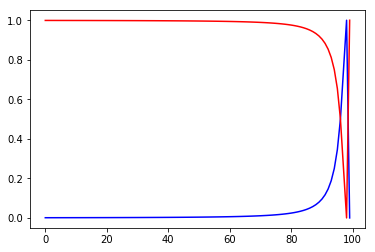

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

a = np.linspace(100, 1, 100)
pi = math.pi
b = np.linspace(pi, pi, 100)
c = b/a
sin_sq = np.sin(c)**2
cos_sq = np.cos(c)**2

print(sin_sq)
print(cos_sq)

plt.plot(sin_sq, 'b-')
plt.plot(cos_sq, 'r-')
plt.show()


### 8.

In [54]:
import numpy as np
A = np.array([1,2,3,4,5,6,7,8,9,10])
def f(a):
    x = a%5 
    if x.all():
        return False
    else:
        return True

f(A)

True